## **Lab 1:  Delta Rule and Batch Delta Rule**

## Code

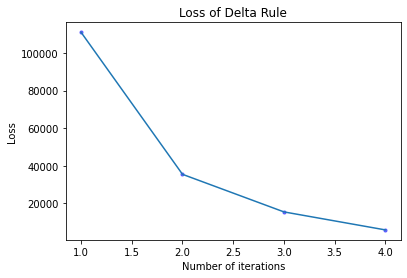

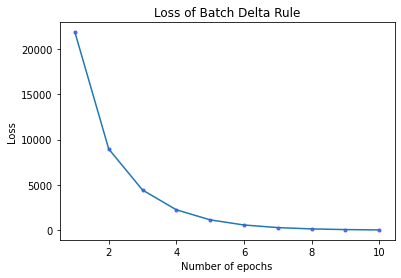

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


class train_data(Dataset):
    def __init__(self, input, target, learning_rate):
        self.input = input
        self.target = target
        self.learning_rate = learning_rate

    def __len__(self):
        return len(self.input)

    def __getitem__(self, index):
        return self.input[index], self.target[index], self.learning_rate[index]


class test_data(Dataset):
    def __init__(self, input, w_vector):
        self.input = input
        self.w_vector = w_vector

    def __len__(self):
        return len(self.w_vector)

    def __getitem__(self, index):
        return self.input[index], self.w_vector[index]


def eval_loss(model):
    loss = torch.tensor([])
    for data, target in test_dataset:
        y_predict = model @ data.t()
        loss = torch.cat((loss, (target - y_predict) ** 2), dim=0)

    return np.array(sum(loss)).tolist()


def delta_rule(model):
    test_loss = []
    for data, target, l_rate in train_dataset1:
        y_predict = model @ data.t()
        diffrnc = y_predict - target
        model = model - (l_rate * diffrnc * data)
        test_loss.append(eval_loss(model))

    return test_loss


def batch_delta_rule(model):
    test_loss = []
    epoch = 0
    while epoch < 10:
        for data, target, l_rate in train_dataset2:
            delta_w = torch.tensor([0, 0, 0])
            for i in range(3):
                y_predict = model @ data[i].t()
                diffrnc = y_predict - target[i]
                delta_w1 = l_rate * diffrnc * data[i]
                delta_w = delta_w + delta_w1

            model = model - delta_w
        test_loss.append(eval_loss(model))
        epoch += 1

    return test_loss


if __name__ == '__main__':
    d = torch.tensor([[5, 2, 4], [3, 3, 3], [0, 5, 1],
                      [2, 1, 2], [1, 0, 5], [4, 2, 1],
                      [6, 1, 1], [2, 3, 4], [7, 3, 0],
                      [4, 4, 2], [1, 5, 7], [5, 1, 3]], dtype=torch.float)
    t = torch.Tensor([1250, 900, 350, 550, 650, 800, 1050, 850, 1200, 1000, 1100, 1100])
    l_rate = torch.Tensor([1 / 70, 1 / 12, 1 / 27, 2 / 20])
    l_rate1 = torch.full((12,), 0.01)

    train_dataset1 = DataLoader(train_data(d[:4, :], t[:4], l_rate), batch_size=1, shuffle=False)
    train_dataset2 = DataLoader(train_data(d, t, l_rate1), batch_size=3, shuffle=False)

    t_d = torch.tensor([[6, 1, 3], [2, 2, 1], [4, 5, 0]], dtype=torch.float)
    t_t = torch.Tensor([1250, 500, 850])
    test_dataset = DataLoader(test_data(t_d, t_t), batch_size=1, shuffle=False)

    model = torch.tensor([[50, 50, 50]], dtype=torch.float)

    delta_loss = delta_rule(model)
    batch_delta_loss = batch_delta_rule(model)

    x = np.linspace(1, 4, len(delta_loss))
    plt.plot(x, delta_loss)
    plt.scatter(x, delta_loss, s=10, c='blue', edgecolor='blue', alpha=0.5)
    plt.title("Loss of Delta Rule")
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')

    plt.show()

    x1 = np.linspace(1, 10, len(batch_delta_loss))
    plt.plot(x1, batch_delta_loss, label='Batch Delta Loss')
    plt.scatter(x1, batch_delta_loss, s=10, c='blue', edgecolor='blue', alpha=0.5)
    plt.title("Loss of Batch Delta Rule")
    plt.xlabel('Number of epochs')
    plt.ylabel('Loss')

    plt.show()


# **Coding Process:**

1. As a first step, two seperate classes are constructed, one for the training data and the other for the test data. 

2. In, both delta rule and batch delta rule, I tried to implement the equations in vector/matrix notation, Hence instead of writing the whole of the equation; $x_{0} \times w_{0} + x_{1}\times w_{1} + x_{2} \times w_{2} + x_{3} \times w_{3}$; I find it more compact and efficient to write it in vector notation and then multiply them using the simple command of matrix multiplication which is explained in equation below. 

\begin{align}
    data &= \begin{bmatrix}
           x_{0}\\
           x_{1} \\
           x_{2} \\
           x_{3}
         \end{bmatrix} \ \ , \ \ 
         W = \begin{bmatrix}
           w_{0}\\
           w_{1} \\
           w_{2} \\
           w_{3}
         \end{bmatrix}
  \end{align}
So,

\begin{align}
    W × data^T = x_{0} \times w_{0} + x_{1}\times w_{1} + x_{2} \times w_{2} + x_{3} \times w_{3}
  \end{align}

3. I decided to go with the seperate evaluation function that calculates the loss on the test data after each iteration in delta rule and each epoch in batch delta rule. 

4. Being a beginner, it took me a while to understand that there is difference between numpy array and tensor array and in Deep Learning it is more convenient to use the Tensor arrays


# **Thoughts and Findings**
Batch delta rule requires computing the gradients for the entire training dataset before updating the model parameters, while delta rule updates the model parameters after each training example. 

1. Batch delta rule is more computationally expensive than delta rule, but it converges faster. 

2. Batch delta rule may get stuck in a local minimum, whereas delta rule may be able to escape local minima by updating the model parameters more frequently.

3. Batch delta rule is less sensitive to noise in the training data
